In [120]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_curve, plot_roc_curve
import sklearn
sklearn.metrics.SCORERS.keys()
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import SelectPercentile, univariate_selection, RFE
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

## __1. Data__

In [2]:
df = pd.read_csv('C:\\Users\\ASUS\\Desktop\\nba_players.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   Unnamed: 0.1       11145 non-null  int64  
 2   player_name        11145 non-null  object 
 3   team_abbreviation  11145 non-null  object 
 4   age                11145 non-null  float64
 5   player_height      11145 non-null  float64
 6   player_weight      11145 non-null  float64
 7   college            11145 non-null  object 
 8   country            11145 non-null  object 
 9   draft_year         11145 non-null  object 
 10  draft_round        11145 non-null  object 
 11  draft_number       11145 non-null  object 
 12  gp                 11145 non-null  int64  
 13  pts                11145 non-null  float64
 14  reb                11145 non-null  float64
 15  ast                11145 non-null  float64
 16  net_rating         111

In [4]:
df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        11145 non-null  object 
 1   team_abbreviation  11145 non-null  object 
 2   age                11145 non-null  float64
 3   player_height      11145 non-null  float64
 4   player_weight      11145 non-null  float64
 5   college            11145 non-null  object 
 6   country            11145 non-null  object 
 7   draft_year         11145 non-null  object 
 8   draft_round        11145 non-null  object 
 9   draft_number       11145 non-null  object 
 10  gp                 11145 non-null  int64  
 11  pts                11145 non-null  float64
 12  reb                11145 non-null  float64
 13  ast                11145 non-null  float64
 14  net_rating         11145 non-null  float64
 15  oreb_pct           11145 non-null  float64
 16  dreb_pct           111

In [39]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [6]:
df["player_name"].nunique()

2235

In [7]:
df["player_name"].unique()

array(['Dennis Rodman', 'Dwayne Schintzius', 'Earl Cureton', ...,
       'Max Strus', 'Norvel Pelle', 'Matt Thomas'], dtype=object)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11145.0,27.168686,4.344164,18.000000,24.0000,27.00000,30.000000,44.00000
player_height,11145.0,200.812818,9.190973,160.020000,195.5800,200.66000,208.280000,231.14000
player_weight,11145.0,100.637868,12.576295,60.327736,90.7184,99.79024,109.315672,163.29312
gp,11145.0,52.005832,25.069495,1.000000,32.0000,58.00000,74.000000,85.00000
pts,11145.0,8.126487,5.935482,0.000000,3.5000,6.60000,11.500000,36.10000
reb,11145.0,3.560036,2.495394,0.000000,1.8000,3.00000,4.700000,16.30000
ast,11145.0,1.801463,1.789940,0.000000,0.6000,1.20000,2.400000,11.70000
net_rating,11145.0,-2.153899,12.150611,-200.000000,-6.3000,-1.30000,3.200000,300.00000
oreb_pct,11145.0,0.055593,0.043889,0.000000,0.0220,0.04300,0.086000,1.00000
dreb_pct,11145.0,0.141772,0.063194,0.000000,0.0960,0.13200,0.182000,1.00000


In [9]:
df.isna().sum()

player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
potential_player     0
dtype: int64

Tidak Ada data Null, sehingga tidak dilakukan "Deal with Missing Values"

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


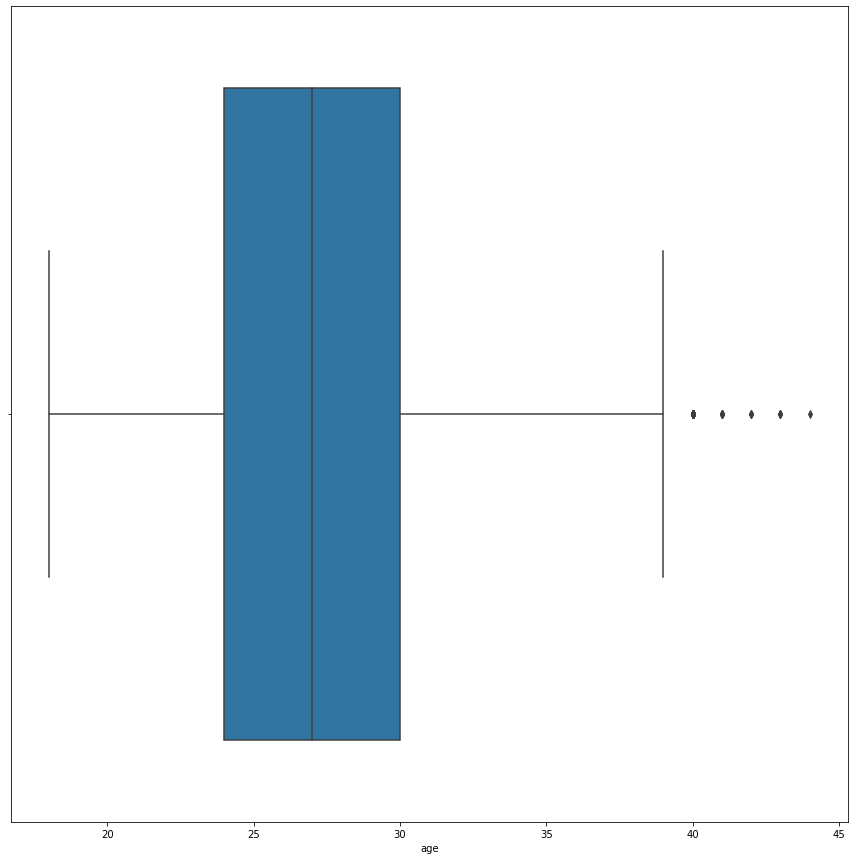

In [11]:
plt.figure(figsize=(15, 15))
sns.boxplot(df['age'])
plt.show()

In [12]:
Q1 = np.quantile(df["age"], 0.25)
Q3 = np.quantile(df["age"], 0.75)
IQR = Q3 - Q1
Up = Q3 + (1.5*IQR)
Low = Q1 - (1.5*IQR)
print("IQR Dari Age: ", IQR)
print("Upper Boundaries dari Age: ", Up)
print("Lower Boundaries dari Age: ", Low)

IQR Dari Age:  6.0
Upper Boundaries dari Age:  39.0
Lower Boundaries dari Age:  15.0


Terdapat 5 data yang dideteksi sebagai outliers

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


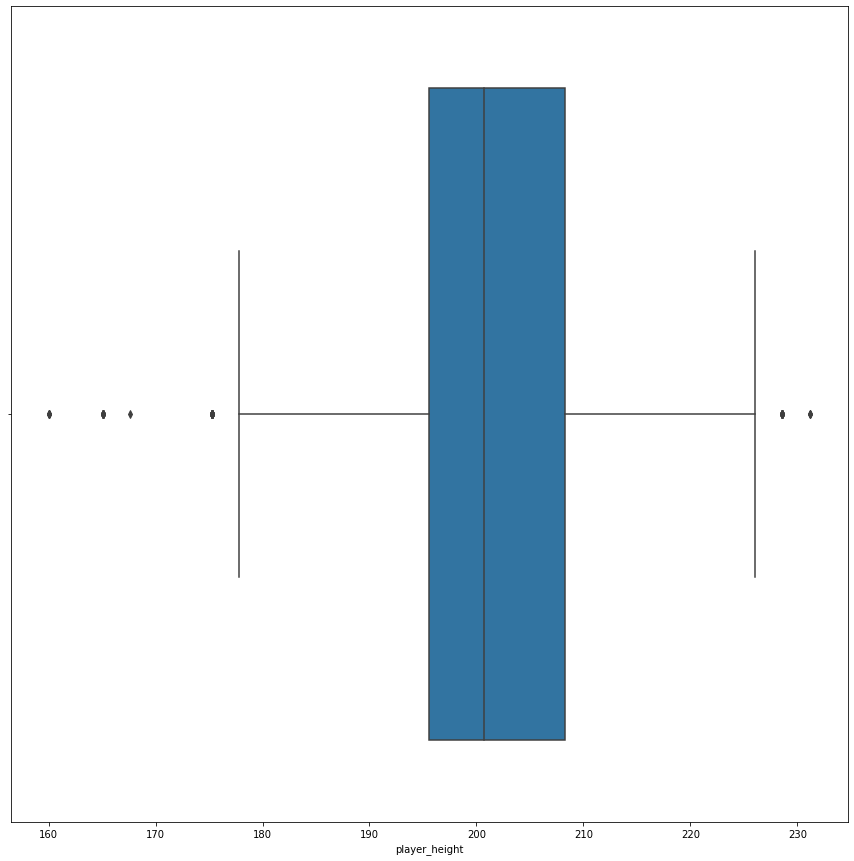

In [13]:
plt.figure(figsize=(15, 15))
sns.boxplot(df['player_height'])
plt.show()

In [14]:
Q1 = np.quantile(df["player_height"], 0.25)
Q3 = np.quantile(df["player_height"], 0.75)
IQR = Q3 - Q1
Up = Q3 + (1.5*IQR)
Low = Q1 - (1.5*IQR)
print("IQR Dari player_height: ", IQR)
print("Upper Boundaries dari player_height: ", Up)
print("Lower Boundaries dari player_height: ", Low)

IQR Dari player_height:  12.699999999999989
Upper Boundaries dari player_height:  227.32999999999998
Lower Boundaries dari player_height:  176.53000000000003


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


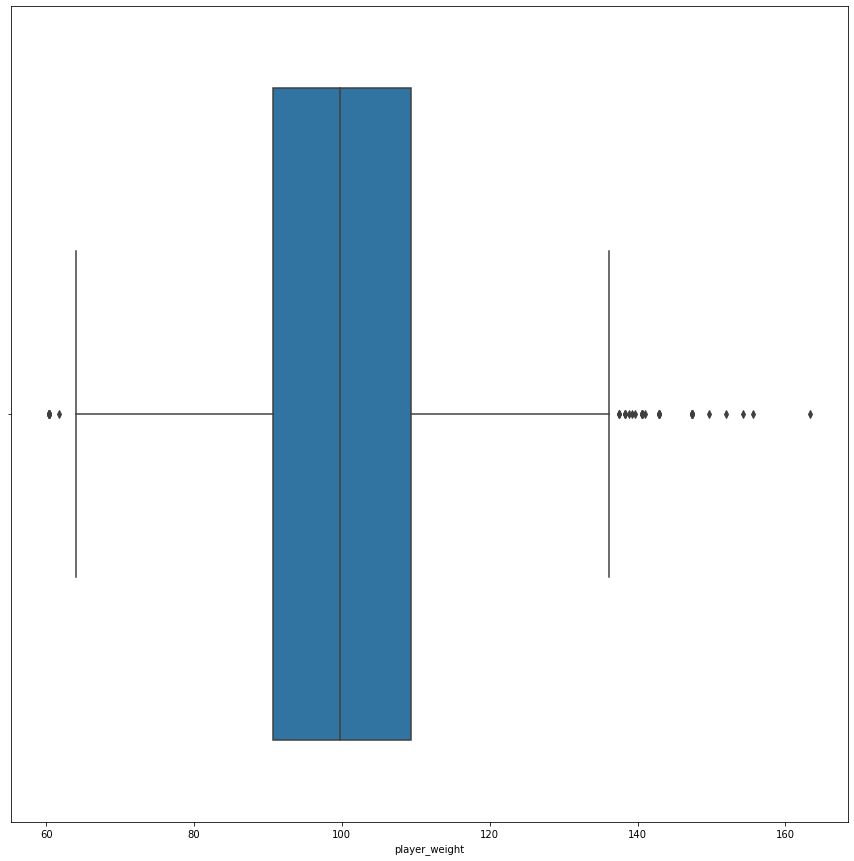

In [15]:
plt.figure(figsize=(15, 15))
sns.boxplot(df['player_weight'])
plt.show()

In [16]:
Q1 = np.quantile(df["player_weight"], 0.25)
Q3 = np.quantile(df["player_weight"], 0.75)
IQR = Q3 - Q1
Up = Q3 + (1.5*IQR)
Low = Q1 - (1.5*IQR)
print("IQR Dari player_weight: ", IQR)
print("Upper Boundaries dari player_weight: ", Up)
print("Lower Boundaries dari player_weight: ", Low)

IQR Dari player_weight:  18.597272000000004
Upper Boundaries dari player_weight:  137.21158000000003
Lower Boundaries dari player_weight:  62.822492


## __2. EDA__

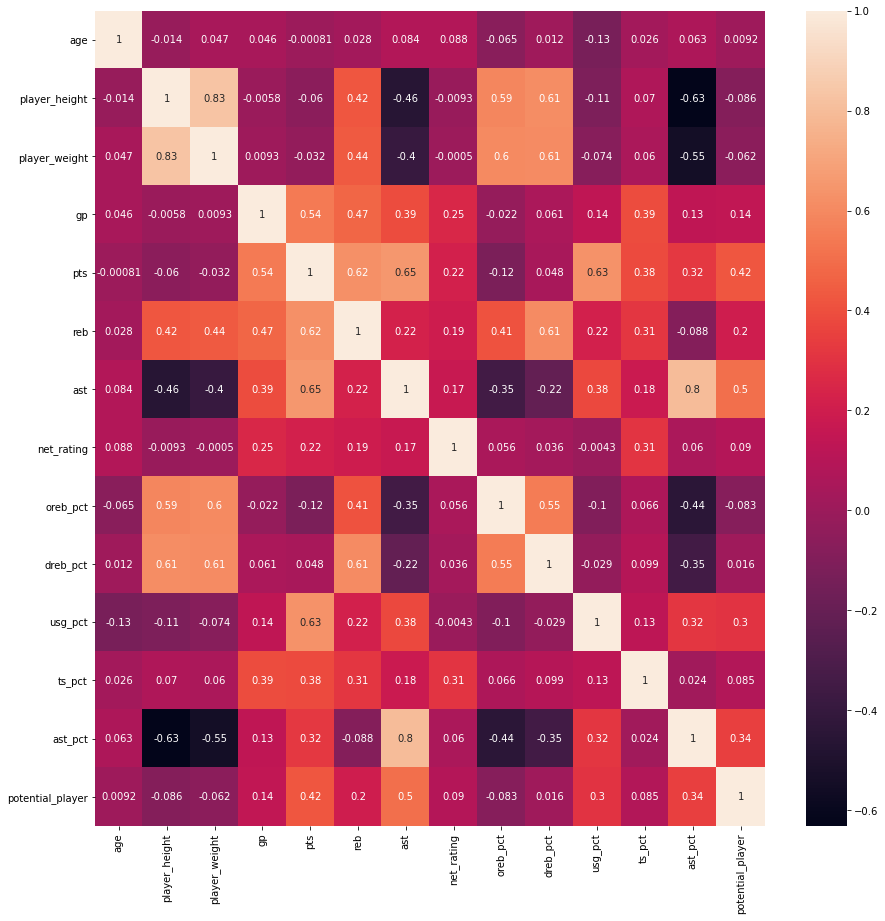

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method = 'pearson'), annot=True)

In [20]:
a = df['potential_player'].value_counts()

In [21]:
a_df = pd.DataFrame(a)

In [22]:
a_df

,potential_player
0,10690
1,455


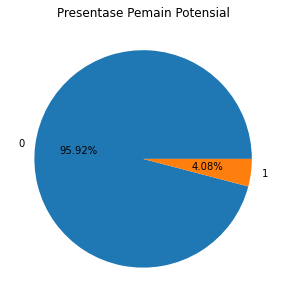

In [23]:
plt.figure(figsize=(10,5))
plt.title('Presentase Pemain Potensial')
plt.pie(a_df['potential_player'], labels=list(a_df.index),
       autopct='%.2f%%')
plt.show()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


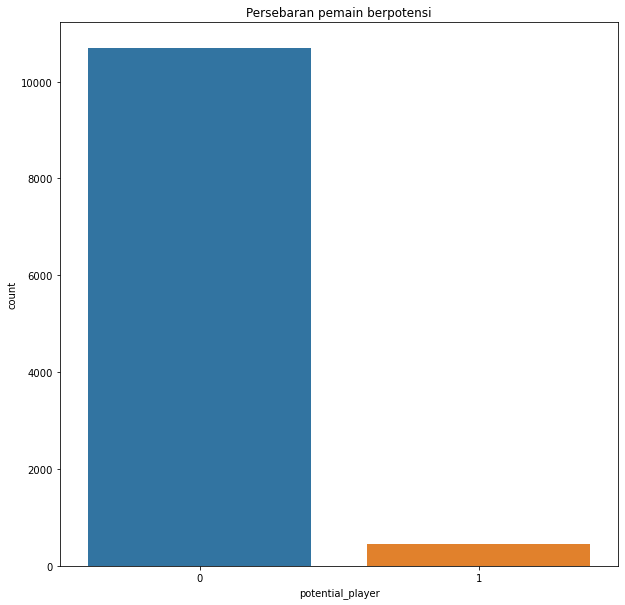

In [24]:
plt.figure(figsize=(10,10))
plt.title("Persebaran pemain berpotensi")
sns.countplot(df['potential_player'])
plt.show()

Persebaran pemain berpotensi ini menunjukan bahwa pemain yang berpotensi hanya 4% dibandingkan dengan pemain yang sudah tidak berpotensi

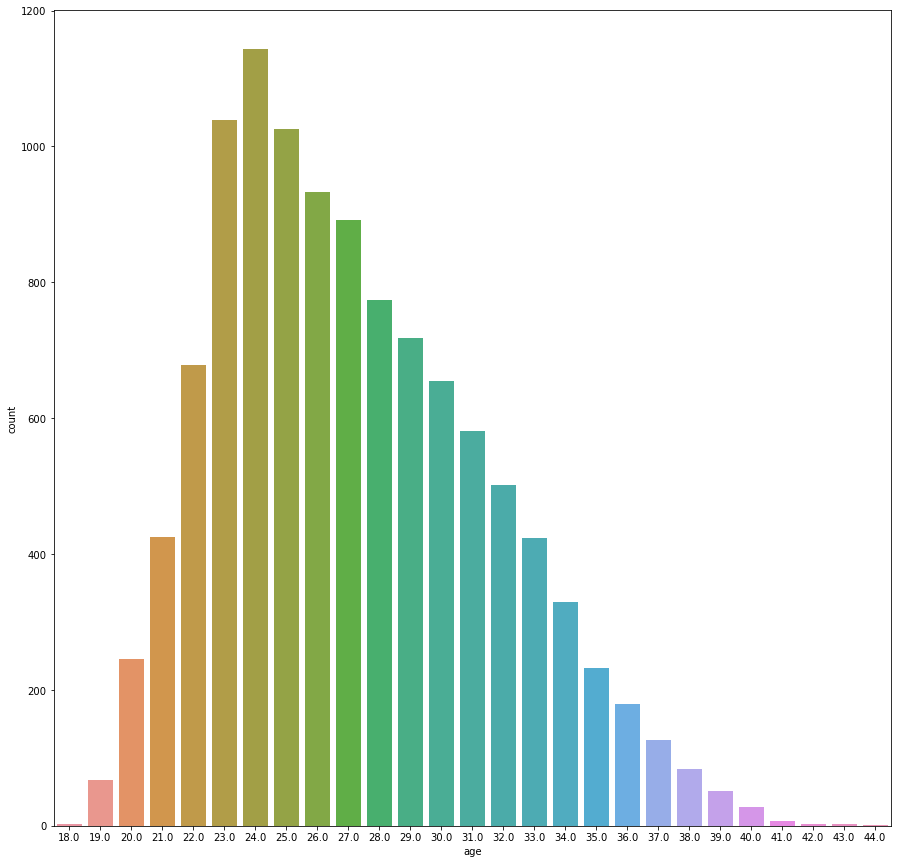

In [28]:
plt.figure(figsize=(15,15))
sns.countplot(x='age', data=df)
plt.show()

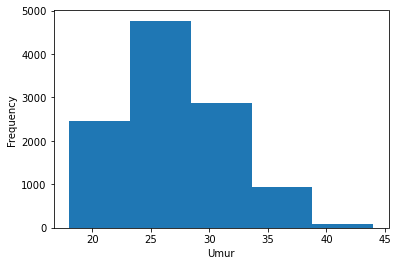

In [25]:
plt.hist(df['age'], bins=5)
plt.xlabel('Umur')
plt.ylabel('Frequency')
plt.show()

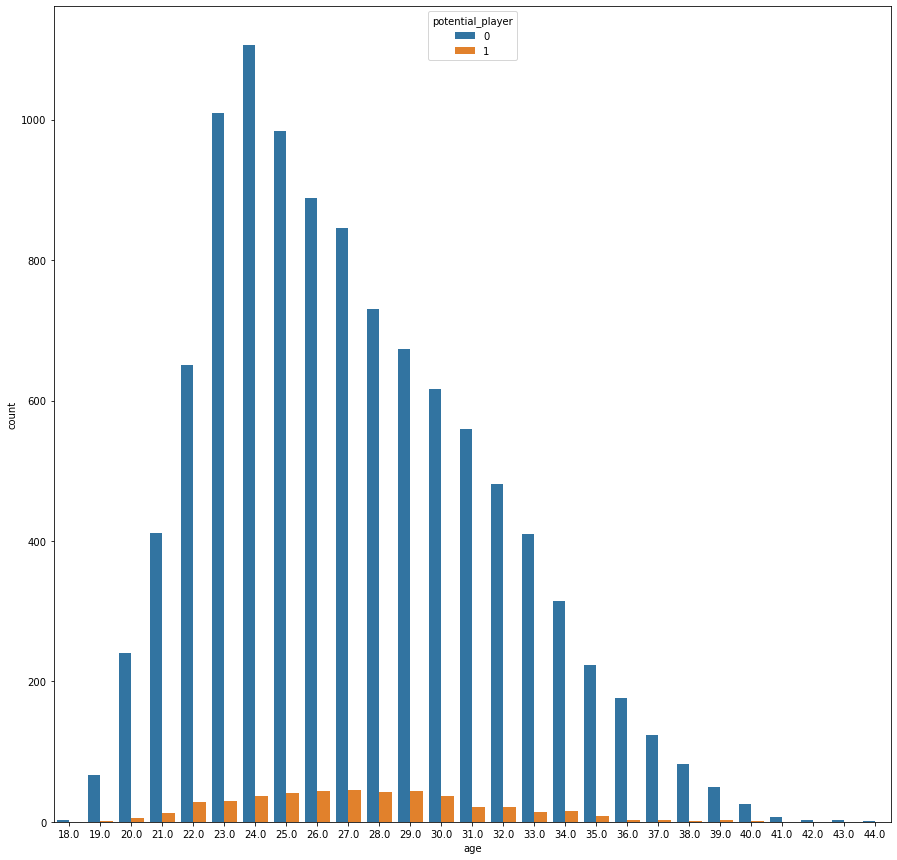

In [31]:
plt.figure(figsize=(15,15))
sns.countplot(x='age', hue='potential_player', data=df)
plt.show()

Sebaran umur pemain basket yang paling banyak adalah di umur 25-30 tahun, dan paling banyak berada di 24 tahun, sedangkan pemain berpotensi tersebar antara 19-40 tahun dengan paling banyak berada di 20-32 tahun

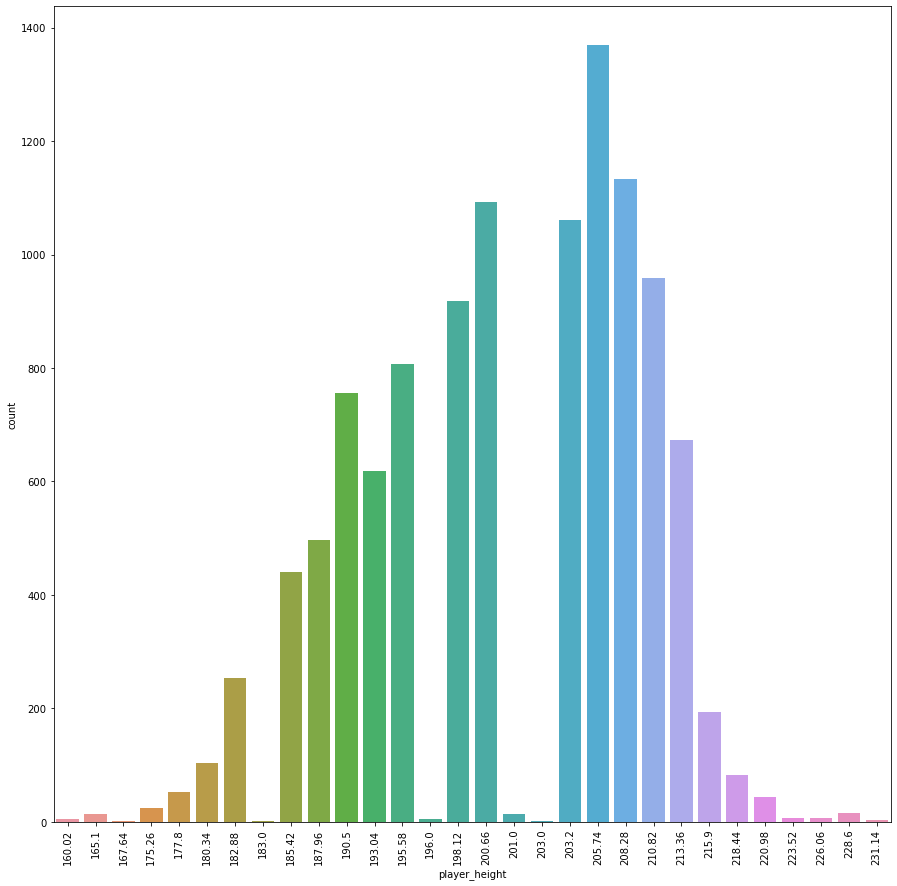

In [33]:
plt.figure(figsize=(15,15))
sns.countplot(x='player_height', data=df)
plt.xticks(rotation=90)
plt.show()

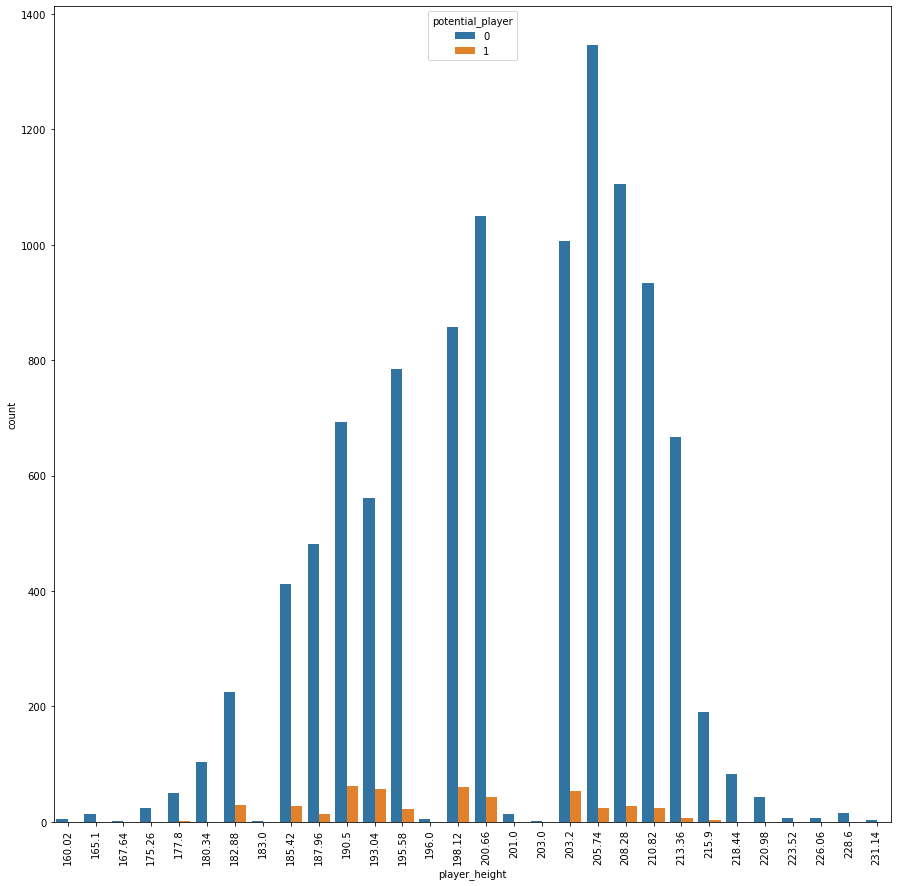

In [34]:
plt.figure(figsize=(15,15))
sns.countplot(x='player_height', hue='potential_player', data=df)
plt.xticks(rotation=90)
plt.show()

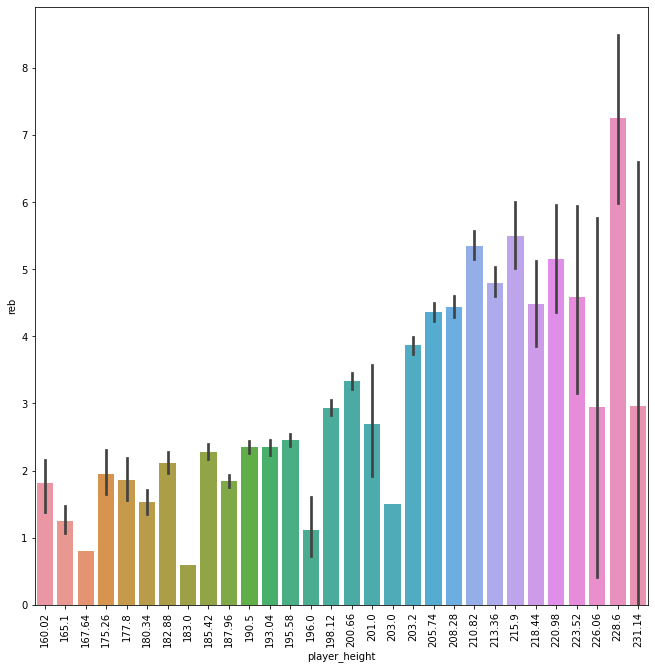

In [47]:
plt.figure(figsize=(11,11))
sns.barplot(x='player_height', y='reb',data=df)
plt.xticks(rotation=90)
plt.show()

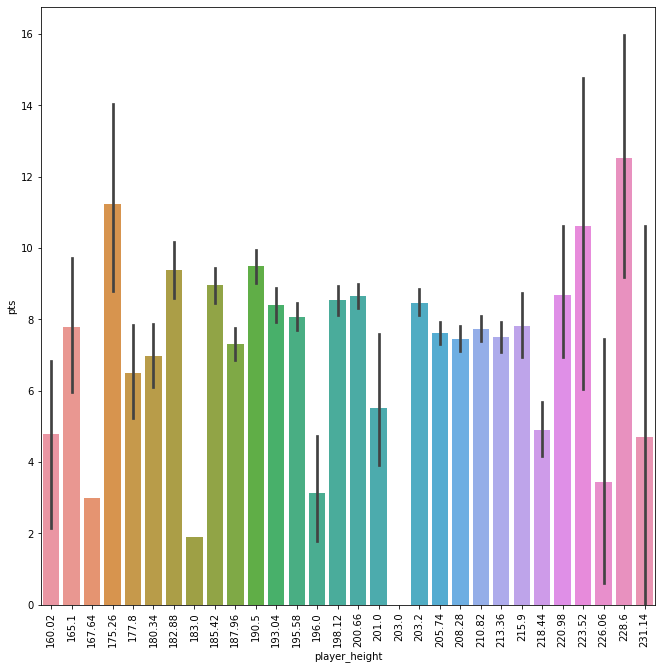

In [48]:
plt.figure(figsize=(11,11))
sns.barplot(x='player_height', y='pts',data=df)
plt.xticks(rotation=90)
plt.show()

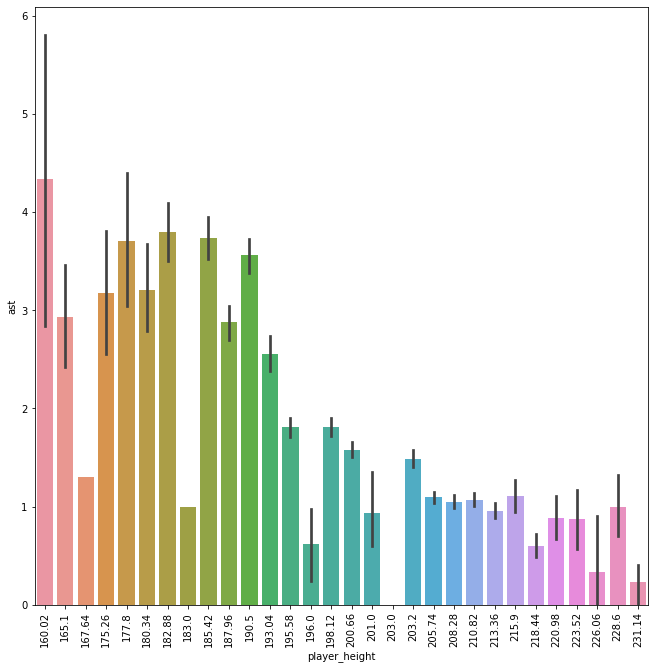

In [49]:
plt.figure(figsize=(11,11))
sns.barplot(x='player_height', y='ast',data=df)
plt.xticks(rotation=90)
plt.show()

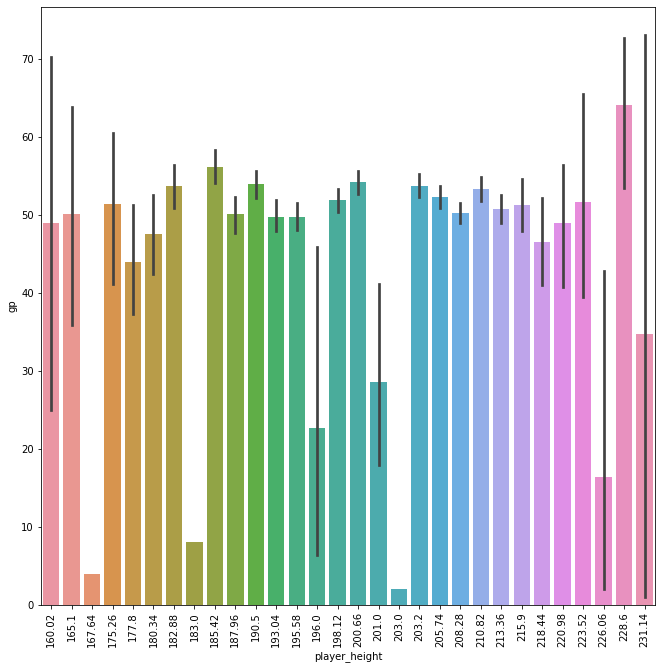

In [50]:
plt.figure(figsize=(11,11))
sns.barplot(x='player_height', y='gp',data=df)
plt.xticks(rotation=90)
plt.show()

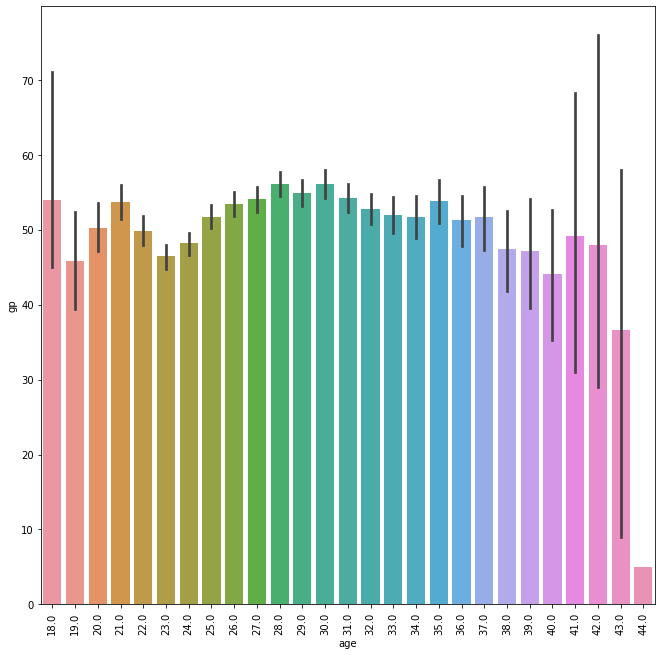

In [41]:
plt.figure(figsize=(11,11))
sns.barplot(x='age', y='gp',data=df)
plt.xticks(rotation=90)
plt.show()

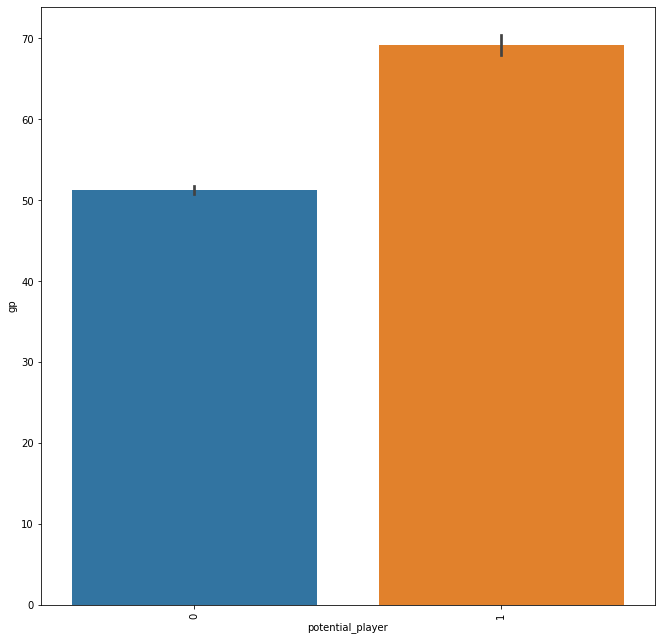

In [44]:
plt.figure(figsize=(11,11))
sns.barplot(x='potential_player', y='gp',data=df)
plt.xticks(rotation=90)
plt.show()

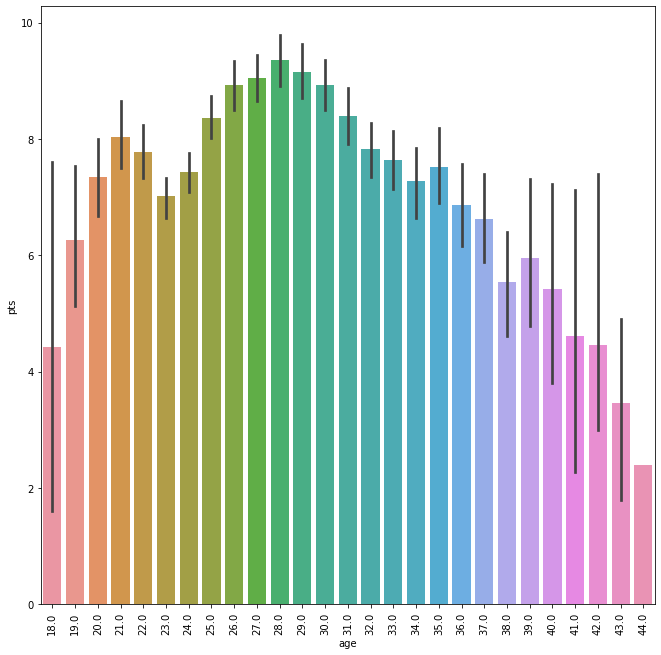

In [45]:
plt.figure(figsize=(11,11))
sns.barplot(x='age', y='pts',data=df)
plt.xticks(rotation=90)
plt.show()

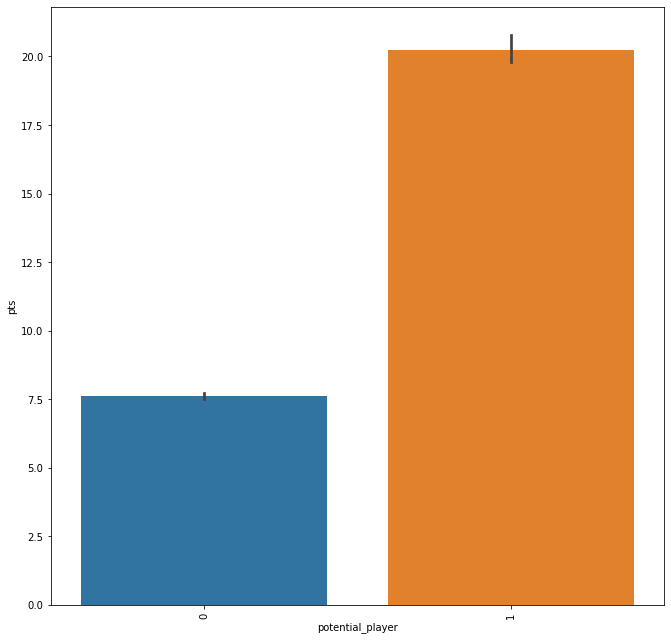

In [46]:
plt.figure(figsize=(11,11))
sns.barplot(x='potential_player', y='pts',data=df)
plt.xticks(rotation=90)
plt.show()

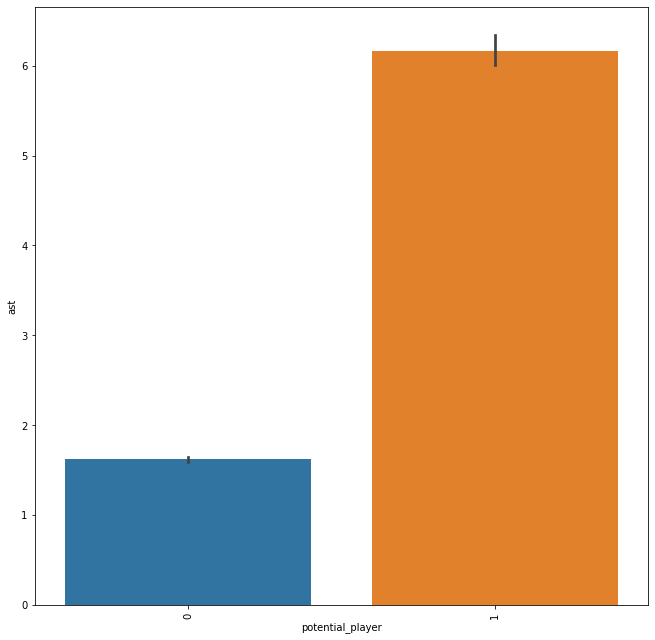

In [51]:
plt.figure(figsize=(11,11))
sns.barplot(x='potential_player', y='ast',data=df)
plt.xticks(rotation=90)
plt.show()

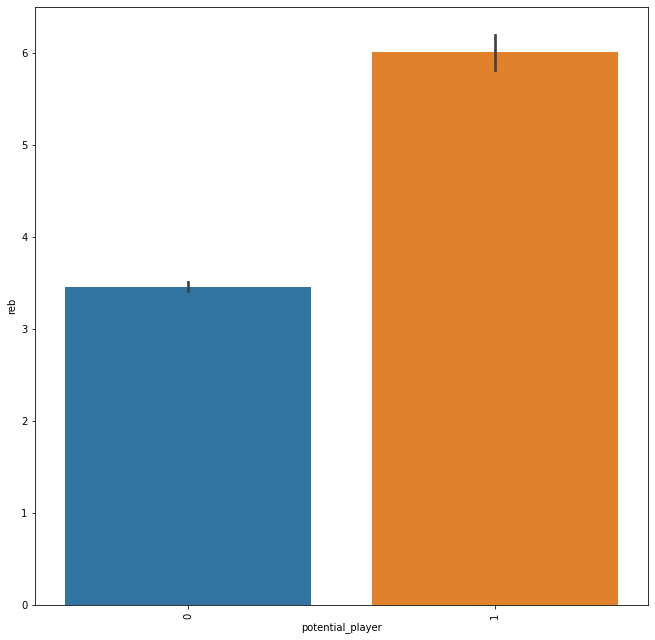

In [52]:
plt.figure(figsize=(11,11))
sns.barplot(x='potential_player', y='reb',data=df)
plt.xticks(rotation=90)
plt.show()

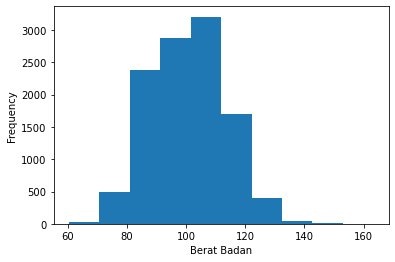

In [38]:
plt.hist(df['player_weight'], bins=10)
plt.xlabel('Berat Badan')
plt.ylabel('Frequency')
plt.show()

## __3.Modelling__

In [53]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,potential_player
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,0
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,24,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,58,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,0
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,9,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,0
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,10,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,0


In [197]:
nb = pd.read_csv('C:\\Users\\ASUS\\Desktop\\new_players.csv')

In [198]:
nb

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [199]:
npb = nb.drop(['Unnamed: 0', 'player_id','college', 'country'], axis=1)

In [200]:
npb

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,21.0,195.58,99.790240,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,23.0,215.90,122.469840,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28.0,200.66,103.418976,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068
496,28.0,200.66,107.047712,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099
497,23.0,208.28,103.418976,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072
498,24.0,213.36,108.862080,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021


In [54]:
df1 = df.drop(['player_name', 'team_abbreviation', 'college','country','draft_year',
                     'draft_round','draft_number','season'], axis=1)

In [55]:
df1

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,potential_player
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,0
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,0
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,0
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,0
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,0
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,0
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,0
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,0


In [87]:
num_df = ['age', "player_height","player_weight", "gp", "pts","reb","ast","net_rating","oreb_pct","dreb_pct","usg_pct","ts_pct","ast_pct"]

In [88]:
X = df1.drop(['potential_player'], axis=1)
y = df1['potential_player']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size =0.2, random_state=1510)

In [90]:
X

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,36.0,198.12,99.790240,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113
1,28.0,215.90,117.933920,15,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048
2,39.0,205.74,95.254320,9,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148
3,24.0,203.20,100.697424,64,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077
4,34.0,205.74,108.862080,27,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,28.0,208.28,108.862080,63,9.1,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064
11141,23.0,195.58,97.522280,15,1.2,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033
11142,28.0,213.36,117.933920,49,6.1,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076
11143,27.0,208.28,104.779752,20,2.1,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056


In [111]:
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
logreg = LogisticRegression()
smote = SMOTE()

In [124]:
knn_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])


# transforming all columns
knn_transformer = ColumnTransformer([
    ('pipe_numeric', knn_pipe_num, num_df),
])

# combine all pipeline
knn_pipe = Pipeline([
    ('transformer', knn_transformer),
    ('knn', knn)
])

In [125]:
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'player_height',
                                                   'player_weight', 'gp', 'pts',
                                                   'reb', 'ast', 'net_rating',
                                                   'oreb_pct', 'dreb_pct',
                                                   'usg_pct', 'ts_pct',
                                                   'ast_pct'])])),
                ('knn', KNeighborsClassifier())])

In [96]:
dtc_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])


# transforming all columns
dtc_transformer = ColumnTransformer([
    ('pipe_numeric', dtc_pipe_num, num_df),
])

# combine all pipeline
dtc_pipe = Pipeline([
    ('transformer', dtc_transformer),
    ('dtc', dtc)
])

In [97]:
dtc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'player_height',
                                                   'player_weight', 'gp', 'pts',
                                                   'reb', 'ast', 'net_rating',
                                                   'oreb_pct', 'dreb_pct',
                                                   'usg_pct', 'ts_pct',
                                                   'ast_pct'])])),
                ('dtc', DecisionTreeClassifier())])

In [98]:
rfc_pipe_num = Pipeline([
    ('scaler', RobustScaler()),
])


# transforming all columns
rfc_transformer = ColumnTransformer([
    ('pipe_numeric', rfc_pipe_num, num_df),
])

# combine all pipeline
rfc_pipe = Pipeline([
    ('transformer', rfc_transformer),
    ('rfc', rfc)
])

In [99]:
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'player_height',
                                                   'player_weight', 'gp', 'pts',
                                                   'reb', 'ast', 'net_rating',
                                                   'oreb_pct', 'dreb_pct',
                                                   'usg_pct', 'ts_pct',
                                                   'ast_pct'])])),
                ('rfc', RandomForestClassifier())])

In [104]:
skfold = StratifiedKFold(n_splits=5, random_state=1510, shuffle=True)

knn_score = cross_val_score(knn_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
dtc_score = cross_val_score(dtc_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(rfc_pipe, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [105]:
print('KNN Val Score:', knn_score)
print('DTC Val Score:', dtc_score)
print('RFC Val Score:', rfc_score)

KNN Val Score: [0.68493151 0.66666667 0.76712329 0.7260274  0.7260274 ]
DTC Val Score: [0.97260274 0.94444444 0.95890411 0.93150685 0.95890411]
RFC Val Score: [0.98630137 0.91666667 0.97260274 0.98630137 0.95890411]


In [106]:
print('KNN Val Score:', knn_score.mean())
print('DTC Val Score:', dtc_score.mean())
print('RFC Val Score:', rfc_score.mean())

KNN Val Score: 0.7141552511415524
DTC Val Score: 0.9532724505327245
RFC Val Score: 0.9641552511415524


In [108]:
dtcs = dtc_score.mean()
rfcs = rfc_score.mean()
kncs = knn_score.mean()
df = pd.DataFrame({'KNearest Neighbors': [kncs], 'Decision Tree CV Score': [dtcs], 'Random Forest CV Score': [rfcs]})
df

,KNearest Neighbors,Decision Tree CV Score,Random Forest CV Score
0,0.714155,0.953272,0.964155


In [136]:
knn_pipes_num = Pipeline([
    ('scaler', RobustScaler())
])


# transforming all columns
knns_transformer = ColumnTransformer([
    ('pipe_numeric', knn_pipes_num, num_df),
])

# combine all pipeline
knn_pipes = Pipeline([
    ('transformer', knns_transformer),
    ('resampling', smote),
    ('knn', knn)
])

In [137]:
knn_pipes.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'player_height',
                                                   'player_weight', 'gp', 'pts',
                                                   'reb', 'ast', 'net_rating',
                                                   'oreb_pct', 'dreb_pct',
                                                   'usg_pct', 'ts_pct',
                                                   'ast_pct'])])),
                ('resampling', SMOTE()), ('knn', KNeighborsClassifier())])

In [161]:
dtc_pipes_num = Pipeline([
    ('scaler', RobustScaler())
])


# transforming all columns
dtcs_transformer = ColumnTransformer([
    ('pipe_numeric', dtc_pipes_num, num_df),
])

# combine all pipeline
dtc_pipes = Pipeline([
    ('transformer', dtcs_transformer),
    ('resampling', smote),
    ('dtc', dtc)
])

In [162]:
dtc_pipes.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'player_height',
                                                   'player_weight', 'gp', 'pts',
                                                   'reb', 'ast', 'net_rating',
                                                   'oreb_pct', 'dreb_pct',
                                                   'usg_pct', 'ts_pct',
                                                   'ast_pct'])])),
                ('resampling', SMOTE()), ('dtc', DecisionTreeClassifier())])

In [163]:
rfc_pipes_num = Pipeline([
    ('scaler', RobustScaler())
])


# transforming all columns
rfcs_transformer = ColumnTransformer([
    ('pipe_numeric', rfc_pipes_num, num_df),
])

# combine all pipeline
rfc_pipes = Pipeline([
    ('transformer', rfcs_transformer),
    ('resampling', smote),
    ('rfc', rfc)
])

In [164]:
rfc_pipes.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'player_height',
                                                   'player_weight', 'gp', 'pts',
                                                   'reb', 'ast', 'net_rating',
                                                   'oreb_pct', 'dreb_pct',
                                                   'usg_pct', 'ts_pct',
                                                   'ast_pct'])])),
                ('resampling', SMOTE()), ('rfc', RandomForestClassifier())])

In [165]:
skfold = StratifiedKFold(n_splits=5, random_state=1510, shuffle=True)

knn_score = cross_val_score(knn_pipes, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
dtc_score = cross_val_score(dtc_pipes, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(rfc_pipes, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished


In [166]:
print('KNN Val Score:', knn_score)
print('DTC Val Score:', dtc_score)
print('RFC Val Score:', rfc_score)

KNN Val Score: [0.98630137 0.94444444 0.97260274 0.90410959 0.93150685]
DTC Val Score: [0.98630137 0.95833333 0.97260274 1.         0.97260274]
RFC Val Score: [0.98630137 0.97222222 0.97260274 1.         0.97260274]


In [167]:
print('KNN Val Score:', knn_score.mean())
print('DTC Val Score:', dtc_score.mean())
print('RFC Val Score:', rfc_score.mean())

KNN Val Score: 0.94779299847793
DTC Val Score: 0.9779680365296803
RFC Val Score: 0.9807458143074582


In [168]:
dtcs = dtc_score.mean()
rfcs = rfc_score.mean()
kncs = knn_score.mean()
df = pd.DataFrame({'KNearest Neighbors': [kncs], 'Decision Tree CV Score': [dtcs], 'Random Forest CV Score': [rfcs]})
df

,KNearest Neighbors,Decision Tree CV Score,Random Forest CV Score
0,0.947793,0.977968,0.980746


In [146]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('pipe_numeric',
                                    Pipeline(steps=[('scaler', RobustScaler())]),
                                    ['age', 'player_height', 'player_weight', 'gp',
                                     'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
                                     'dreb_pct', 'usg_pct', 'ts_pct',
                                     'ast_pct'])])),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('pipe_numeric',
                                  Pipeline(steps=[('scaler', RobustScaler())]),
                                  ['age', 'player_height', 'player_weight', 'gp',
                                   'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
                                   'dreb_pct', 'usg_pct', 'ts_pct',
                                   'ast_pct'])]),
 'knn': KNeighborsClassifier(),
 'transformer__n_

In [147]:
knn_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'knn', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [152]:
knn_param = {'knn__n_neighbors': [10, 30, 40 , 60 ,70, 80, 100], 
             'knn__p': [1,2], 
             'knn__leaf_size': [10, 20, 40, 50, 70, 80, 100]}

knn_tuned = GridSearchCV(estimator=knn_pipes,
                          param_grid=knn_param, 
                          cv=skfold,
                          n_jobs=-1,
                          scoring='recall',
                          verbose=1
                          )

In [153]:
knn_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:  1.7min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'player_height',
                                                                          'player_weight',
                                                                          'gp',
                                                                          'pts',
                                                                          'reb',
                                                                

In [154]:
report_grid = pd.DataFrame(knn_tuned.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__leaf_size,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
48,0.139520,0.002869,1.606881,0.150120,50,60,1,"{'knn__leaf_size': 50, 'knn__n_neighbors': 60,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
68,0.159309,0.024363,2.075013,0.300490,70,100,1,"{'knn__leaf_size': 70, 'knn__n_neighbors': 100...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
67,0.137121,0.009190,1.651854,0.170187,70,80,2,"{'knn__leaf_size': 70, 'knn__n_neighbors': 80,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
66,0.145916,0.015025,2.072016,0.329408,70,80,1,"{'knn__leaf_size': 70, 'knn__n_neighbors': 80,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
65,0.146316,0.018789,1.392804,0.080907,70,70,2,"{'knn__leaf_size': 70, 'knn__n_neighbors': 70,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.203283,0.057924,1.348029,0.208379,40,40,2,"{'knn__leaf_size': 40, 'knn__n_neighbors': 40,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
32,0.146915,0.016115,1.607083,0.137979,40,40,1,"{'knn__leaf_size': 40, 'knn__n_neighbors': 40,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
31,0.181497,0.019282,1.214506,0.108550,40,30,2,"{'knn__leaf_size': 40, 'knn__n_neighbors': 30,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
30,0.148915,0.019869,1.588692,0.059208,40,30,1,"{'knn__leaf_size': 40, 'knn__n_neighbors': 30,...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [155]:
knn_tun = knn_tuned.best_estimator_

In [156]:
knn_tuned_score = cross_val_score(knn_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
knn_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.9s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


array([1., 1., 1., 1., 1.])

In [157]:
print(knn_tuned_score.mean())

1.0


In [158]:
dtc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'dtc', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'dtc__ccp_alpha', 'dtc__class_weight', 'dtc__criterion', 'dtc__max_depth', 'dtc__max_features', 'dtc__max_leaf_nodes', 'dtc__min_impurity_decrease', 'dtc__min_impurity_split', 'dtc__min_samples_leaf', 'dtc__min_samples_split', 'dtc__min_weight_fraction_leaf', 'dtc__presort', 'dtc__random_state', 'dtc__splitter'])

In [169]:
dtc_param = {
    'dtc__criterion': ['gini', 'entropy'],
    'dtc__max_depth':[5,10,15,20,25,30],
    'dtc__min_samples_split':[2,5,10],
    'dtc__min_samples_leaf':[1,2,5,7],
}

dtc_tuned = GridSearchCV(estimator=dtc_pipes, 
                            param_grid=dtc_param, 
                            cv=skfold, 
                            n_jobs=-1, 
                            scoring='recall',
                           verbose=1)

In [170]:
dtc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   16.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'player_height',
                                                                          'player_weight',
                                                                          'gp',
                                                                          'pts',
                                                                          'reb',
                                                                

In [171]:
report_grid = pd.DataFrame(dtc_tuned.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtc__criterion,param_dtc__max_depth,param_dtc__min_samples_leaf,param_dtc__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
143,0.150113,0.018659,0.005198,0.001165,entropy,30,7,10,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.986301,1.0,0.986301,1.000000,0.986301,0.991781,0.006711,1
96,0.188292,0.011835,0.009195,0.002481,entropy,15,1,2,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",1.000000,1.0,0.986301,0.986301,0.986301,0.991781,0.006711,1
89,0.193688,0.003654,0.013992,0.006690,entropy,10,2,10,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",1.000000,1.0,0.986301,0.986301,0.986301,0.991781,0.006711,1


In [172]:
dtc_tun = dtc_tuned.best_estimator_

In [173]:
dtc_tuned_score = cross_val_score(dtc_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
dtc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


array([0.98630137, 0.98611111, 0.98630137, 0.98630137, 0.98630137])

In [174]:
dtc_tuned_score.mean()

0.986263318112633

In [175]:
rfc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transformer', 'rfc', 'transformer__n_jobs', 'transformer__remainder', 'transformer__sparse_threshold', 'transformer__transformer_weights', 'transformer__transformers', 'transformer__verbose', 'transformer__pipe_numeric', 'transformer__pipe_numeric__memory', 'transformer__pipe_numeric__steps', 'transformer__pipe_numeric__verbose', 'transformer__pipe_numeric__scaler', 'transformer__pipe_numeric__scaler__copy', 'transformer__pipe_numeric__scaler__quantile_range', 'transformer__pipe_numeric__scaler__with_centering', 'transformer__pipe_numeric__scaler__with_scaling', 'rfc__bootstrap', 'rfc__ccp_alpha', 'rfc__class_weight', 'rfc__criterion', 'rfc__max_depth', 'rfc__max_features', 'rfc__max_leaf_nodes', 'rfc__max_samples', 'rfc__min_impurity_decrease', 'rfc__min_impurity_split', 'rfc__min_samples_leaf', 'rfc__min_samples_split', 'rfc__min_weight_fraction_leaf', 'rfc__n_estimators', 'rfc__n_jobs', 'rfc__oob_score', 'rfc__random_state', 'rfc__verbose', 

In [184]:
rfc_param = {'rfc__n_estimators': [400, 800, 1100],
            'rfc__max_depth': [10, 20, 30, 50],
            'rfc__min_samples_split': [2, 5, 10],
            'rfc__max_features': ['auto'],
            'rfc__min_samples_leaf' : [2, 4, 6]
           }


rfc_tuned = RandomizedSearchCV(estimator=rfc_pipes, 
                            param_distributions=rfc_param,
                            n_iter=20,
                            cv=skfold, 
                            n_jobs=-1, 
                            scoring='recall',
                           verbose=1)

In [185]:
rfc_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1510, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('pipe_numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                RobustScaler())]),
                                                                               ['age',
                                                                                'player_height',
                                                                                'player_weight',
                                                                                'gp',
                                                                                'pts',
                                                                                'reb'

In [186]:
report_grid = pd.DataFrame(rfc_tuned.cv_results_).sort_values('rank_test_score', ascending=True)
report_grid[report_grid['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rfc__n_estimators,param_rfc__min_samples_split,param_rfc__min_samples_leaf,param_rfc__max_features,param_rfc__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,31.680685,0.683542,0.390776,0.014798,1100,10,4,auto,30,"{'rfc__n_estimators': 1100, 'rfc__min_samples_...",0.986301,1.0,0.986301,0.986301,0.986301,0.989041,0.005479,1


In [187]:
rfc_tun = rfc_tuned.best_estimator_

In [188]:
rfc_tuned_score = cross_val_score(rfc_tun, X_train, y_train, scoring='recall', cv=skfold, n_jobs=-1, verbose=1)
rfc_tuned_score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   21.1s remaining:   31.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   21.5s finished


array([0.98630137, 0.98611111, 0.98630137, 0.98630137, 0.98630137])

In [189]:
rfc_tuned_score.mean()

0.986263318112633

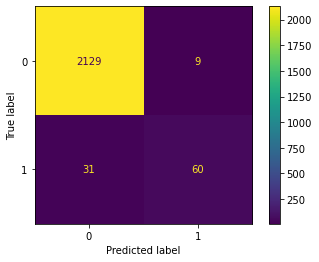

In [190]:
knn_pipe.fit(X_train, y_train)
plot_confusion_matrix(knn_pipe, X_test, y_test)

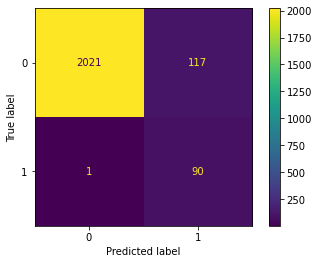

In [191]:
knn_tun.fit(X_train, y_train)
plot_confusion_matrix(knn_tun, X_test, y_test)

In [192]:
knn_tun.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'player_height',
                                                   'player_weight', 'gp', 'pts',
                                                   'reb', 'ast', 'net_rating',
                                                   'oreb_pct', 'dreb_pct',
                                                   'usg_pct', 'ts_pct',
                                                   'ast_pct'])])),
                ('resampling', SMOTE()),
                ('knn',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=30, p=1))])

In [193]:
npb.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,37.0,205.74,104.326160,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069
1,33.0,160.02,63.956472,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344
2,27.0,193.04,95.254320,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250
3,21.0,195.58,99.790240,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174
4,23.0,215.90,122.469840,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037


In [201]:
player_pred = knn_tun.predict(npb)

In [202]:
player_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [203]:
nb['Prediksi'] = player_pred

In [204]:
nb

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Prediksi
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0


In [205]:
nb['Status']=nb.apply(lambda x: 'Rekrut' if (x['Prediksi']== 1) else 'Tidak Rekrut', axis=1)
nb

,Unnamed: 0,player_id,age,player_height,player_weight,college,country,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,Prediksi,Status
0,0,1,37.0,205.74,104.326160,Texas Christian,USA,70,3.0,4.2,0.7,-5.2,0.084,0.237,0.114,0.489,0.069,0,Tidak Rekrut
1,1,2,33.0,160.02,63.956472,Wake Forest,USA,61,5.7,2.2,5.4,-8.4,0.020,0.074,0.129,0.492,0.344,0,Tidak Rekrut
2,2,3,27.0,193.04,95.254320,Indiana,USA,36,18.8,5.6,5.2,5.6,0.018,0.154,0.278,0.519,0.250,1,Rekrut
3,3,4,21.0,195.58,99.790240,Cincinnati,USA,42,2.5,1.3,1.1,-4.2,0.030,0.115,0.171,0.400,0.174,0,Tidak Rekrut
4,4,5,23.0,215.90,122.469840,None,USA,26,3.3,3.4,0.3,-7.8,0.069,0.221,0.112,0.551,0.037,0,Tidak Rekrut
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,496,28.0,200.66,103.418976,Nevada-Las Vegas,USA,81,21.8,11.8,1.8,7.1,0.086,0.238,0.222,0.591,0.068,0,Tidak Rekrut
496,496,497,28.0,200.66,107.047712,California,USA,78,12.8,4.4,1.6,-4.9,0.054,0.124,0.233,0.490,0.099,0,Tidak Rekrut
497,497,498,23.0,208.28,103.418976,Wisconsin,USA,46,4.7,2.6,0.5,0.2,0.087,0.162,0.174,0.536,0.072,0,Tidak Rekrut
498,498,499,24.0,213.36,108.862080,DePaul,USA,69,6.1,3.9,0.2,-1.7,0.099,0.140,0.146,0.598,0.021,0,Tidak Rekrut
